In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
study_folder = r"C:\Users\Tobias\Documents\Masterarbeit_lokal\ParamStudies\1"

PSets_Info = pd.read_csv(Path(study_folder) / "ParameterSet.csv")
PSets_Eval = pd.read_csv(Path(study_folder) / "EvaluationParameterStudy.csv")

In [3]:
#specific_surface_ref = PSets_Eval["surface_ref"] / PSets_Eval["volume_ref"]
#specific_surface_rec = PSets_Eval["surface_rec"] / PSets_Eval["volume_rec"]
#specific_surface_error = (specific_surface_rec-specific_surface_ref)/specific_surface_ref
#PSets_Eval["spec_surface_error_perc"] = specific_surface_error*100
sphericity_abs_error = PSets_Eval["sphericity_rec"] - PSets_Eval["sphericity_ref"]
PSets_Eval["sphericity_error"] = sphericity_abs_error
PSets_Bundle = pd.concat([PSets_Info,PSets_Eval],axis=1)

In [4]:
PSets_Eval_small = PSets_Eval[["Mesh2MeshDist_mean","cam_mean_abs_error","cam_outliers","rec_cams","sphericity_error"]]
PSets_Eval_small_small = PSets_Eval[["Mesh2MeshDist_mean","cam_mean_abs_error","cam_outliers","sphericity_error"]]
PSets_Info_small = PSets_Info[["cam_distance","cam_number","reps"]]
PSets_Info_small_small =  PSets_Info[["cam_distance","cam_number"]]

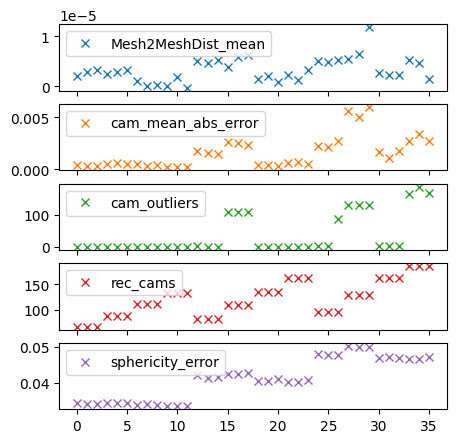

In [5]:
PSets_Eval_small.plot(subplots=True, layout=(len(PSets_Eval_small.columns), 1), figsize=(5, 5), sharex=True, style='x')
plt.show()

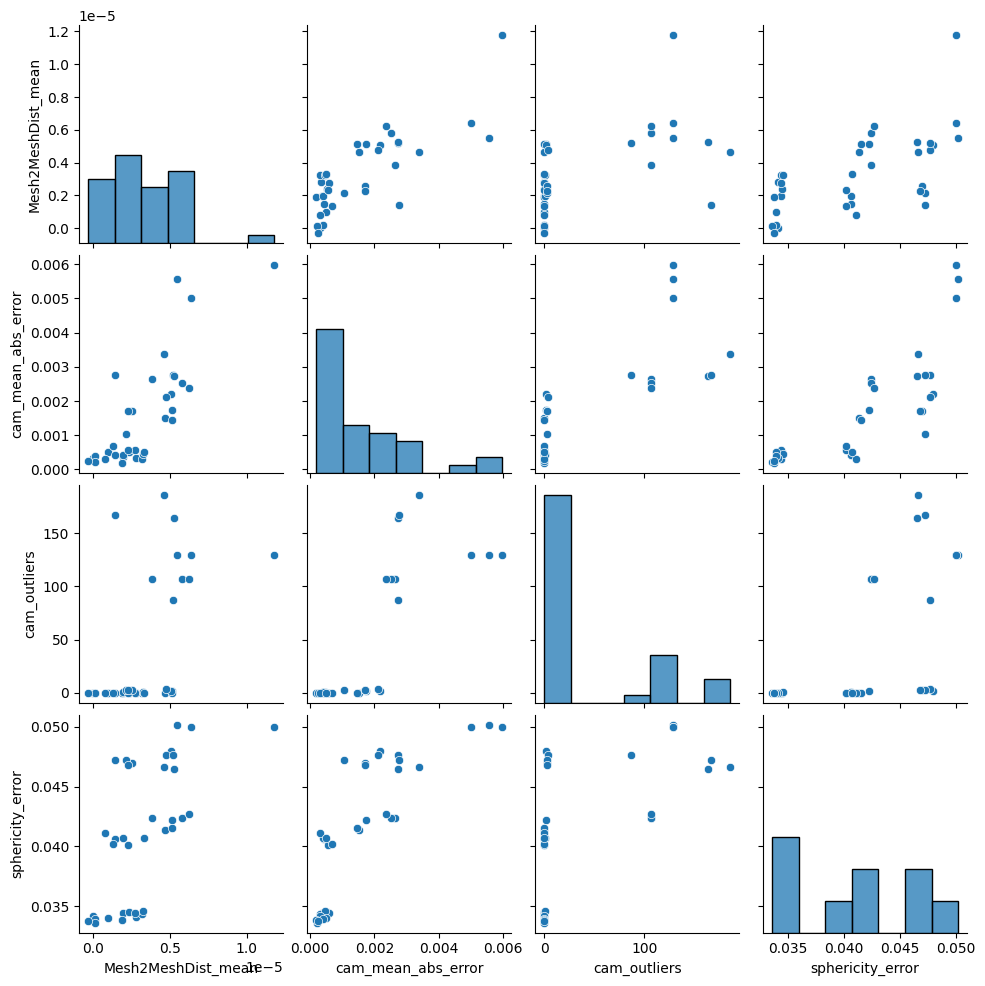

In [6]:
sns.pairplot(PSets_Eval_small_small)

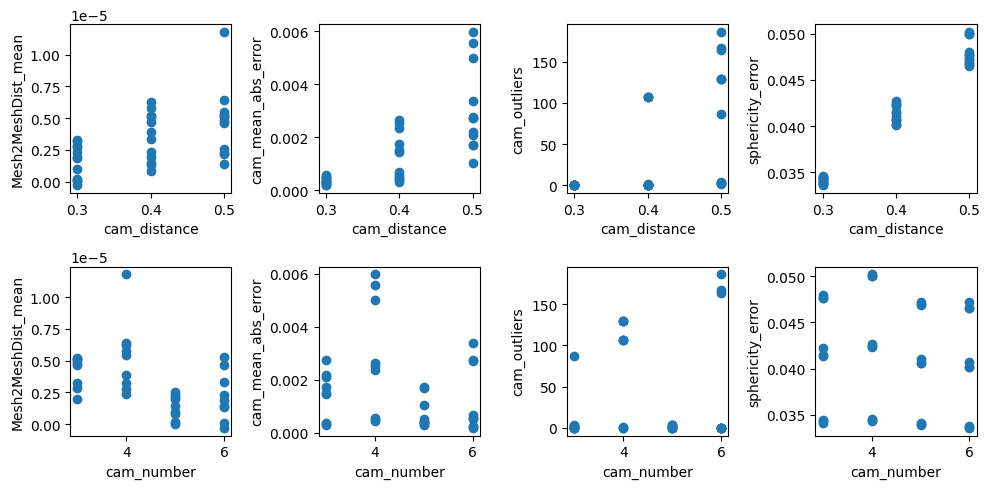

In [7]:
# Spalten von df1 und df2
columns_df1 = PSets_Info_small_small.columns
columns_df2 = PSets_Eval_small_small.columns

# Scatterplots erstellen
fig1, axes = plt.subplots(len(columns_df1), len(columns_df2), figsize=(10, 5))

for i, col1 in enumerate(columns_df1):
    for j, col2 in enumerate(columns_df2):
        axes[i, j].scatter(PSets_Info_small_small[col1], PSets_Eval_small_small[col2])
        axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel(col2)

plt.tight_layout()
plt.savefig("InfoVsEva.svg", format='svg')

plt.show()

In [20]:
columns_df1

Index(['cam_distance', 'cam_number'], dtype='object')

C:\Users\Tobias\AppData\Local\Temp\ipykernel_21292\1886816699.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_cam_count = plt.cm.get_cmap('Set1', len(PSets_Info_small_small['cam_number'].unique()))
C:\Users\Tobias\AppData\Local\Temp\ipykernel_21292\1886816699.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors_cam_distance = plt.cm.get_cmap('Set2', len(PSets_Info_small_small['cam_distance'].unique()))


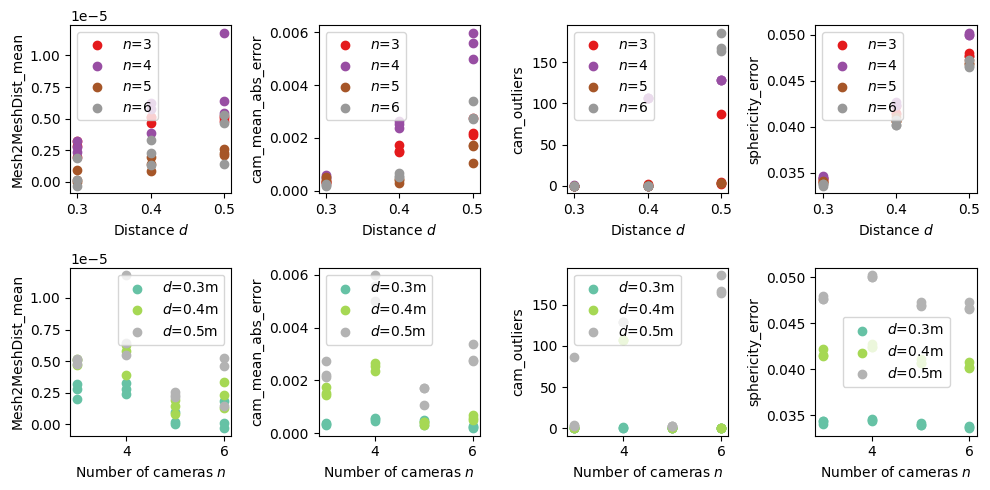

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming the camera numbers and distances are columns in your dataframes
# Modify this section according to your actual dataframe columns

# Scatterplots erstellen
fig, axes = plt.subplots(len(columns_df1), len(columns_df2), figsize=(10, 5))

# Example colors based on unique values for better visualization (you can define your own colors)
colors_cam_count = plt.cm.get_cmap('Set1', len(PSets_Info_small_small['cam_number'].unique()))
colors_cam_distance = plt.cm.get_cmap('Set2', len(PSets_Info_small_small['cam_distance'].unique()))

for i, col1 in enumerate(columns_df1):
    for j, col2 in enumerate(columns_df2):
        if i == 0:  # First row: Color by camera number
            for idx, cam_num in enumerate(PSets_Info_small_small['cam_number'].unique()):
                subset = PSets_Info_small_small[PSets_Info_small_small['cam_number'] == cam_num]
                axes[i, j].scatter(subset[col1], PSets_Eval_small_small.loc[subset.index, col2],
                                   color=colors_cam_count(idx), label=f'$n$={cam_num}')
            axes[i, j].legend()
            axes[i, j].set_xlabel("Distance $d$")
        elif i == 1:  # Second row: Color by camera distance
            for idx, cam_dist in enumerate(PSets_Info_small_small['cam_distance'].unique()):
                subset = PSets_Info_small_small[PSets_Info_small_small['cam_distance'] == cam_dist]
                axes[i, j].scatter(subset[col1], PSets_Eval_small_small.loc[subset.index, col2],
                                   color=colors_cam_distance(idx), label=f'$d$={cam_dist}m')
            axes[i, j].legend()
            axes[i, j].set_xlabel("Number of cameras $n$")
        else:
            axes[i, j].scatter(PSets_Info_small_small[col1], PSets_Eval_small_small[col2])

        #axes[i, j].set_xlabel(col1)
        axes[i, j].set_ylabel(col2)

plt.tight_layout()
plt.savefig("InfoVsEva.svg", format='svg')
plt.show()

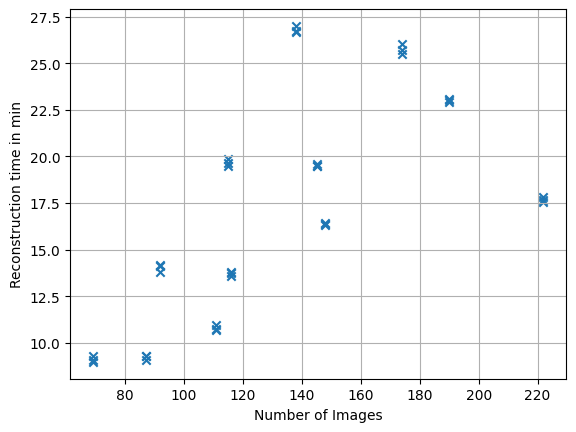

In [8]:
fig, ax = plt.subplots()  # Erstellen einer Figur und eines Subplots
ax.scatter(PSets_Eval["images"], PSets_Info["rec_time"]/60,marker="x")  # Erstellen eines Scatter-Plots

ax.set_xlabel("Number of Images")  # Beschriftung der x-Achse
ax.set_ylabel("Reconstruction time in min")  # Beschriftung der y-Achse
ax.grid(True)
plt.show()  # Anzeigen des Plots

In [9]:
LargeNumberOutliers = PSets_Bundle[PSets_Bundle["cam_outliers"]>100]
LargeNumberOutliers

,cam_distance,cam_number,motion_e,motion_omega,motion_s0,object,reps,rec_time,output_dir,image_dir,...,surface_rec,sphericity_ref,sphericity_rec,cam_mean_abs_error,cam_std_abs_error,cam_outliers,cam_threshold,rec_cams,images,sphericity_error
15,0.4,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,1,814.887405,ParameterStudy_16_1,ParameterStudy_16_1\Images,...,0.003423,0.671746,0.714139,0.002644,0.000194,107,0.005,108,116,0.042393
16,0.4,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,2,826.294341,ParameterStudy_17_2,ParameterStudy_17_2\Images,...,0.003423,0.671746,0.714149,0.002526,0.000197,107,0.005,108,116,0.042403
17,0.4,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,3,829.370825,ParameterStudy_18_2,ParameterStudy_18_2\Images,...,0.003419,0.671746,0.714447,0.002369,0.000195,107,0.005,108,116,0.042701
27,0.5,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,1,980.119166,ParameterStudy_28,ParameterStudy_28\Images,...,0.003419,0.671746,0.721935,0.005576,0.000377,129,0.005,129,148,0.050189
28,0.5,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,2,982.421585,ParameterStudy_29,ParameterStudy_29\Images,...,0.003412,0.671746,0.721711,0.005000,0.000330,129,0.005,129,148,0.049965
29,0.5,4,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,3,984.264761,ParameterStudy_30,ParameterStudy_30\Images,...,0.003429,0.671746,0.721732,0.005979,0.000289,129,0.005,129,148,0.049986
33,0.5,6,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,1,1059.276306,ParameterStudy_34_1,ParameterStudy_34_1\Images,...,0.003395,0.671746,0.718251,0.002722,0.000313,164,0.005,186,222,0.046505
34,0.5,6,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,2,1054.485586,ParameterStudy_35,ParameterStudy_35\Images,...,0.003404,0.671746,0.718348,0.003377,0.000349,186,0.005,186,222,0.046602
35,0.5,6,"[1, 1, 1]",4500,"[0, 0, 1.1]",GRAU5,3,1069.648392,ParameterStudy_36,ParameterStudy_36\Images,...,0.003390,0.671746,0.718985,0.002755,0.000403,167,0.005,186,222,0.047239
